In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/anaconda3/li

In [12]:
df = pd.read_csv("/data/kaggle/data_combined_cleaned.csv")
df = df.drop(columns=["Id"])
df = df[~df.SalesPrice.isnull()]
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [51]:
target = "SalesPrice"
X = df.drop(columns=[target]) # Features
y = np.log(df[target]) # target variable

X = pd.get_dummies(X, drop_first=True) # One hot encoding

# Randomly split the data into training and test test. 
# Keeping 30% of the records in test set.
# random_state creates a reproducible set of random samples 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)



models = [
    ("linear_regression", linear_model.LinearRegression()),
    ("Lasso", linear_model.Lasso(alpha=0.001, max_iter=2000)),
    ("Ridge", linear_model.Ridge(alpha=100.1, max_iter=2000)),
    ("ElasticNet", linear_model.ElasticNet(alpha=0.01, l1_ratio=0.1, max_iter=2000, random_state=1))
]

scores = []
for label, est in models:
    pipe = pipeline.Pipeline([
        ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
        ("scaler", preprocessing.StandardScaler()),
        ("est", est)
    ])
    pipe.fit(X_train, y_train)

    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_test_pred)
    r2_train = metrics.r2_score(y_train, y_train_pred)
    scores.append((label, r2_test, r2_train))
    
    
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
r2_test = metrics.r2_score(y_test, y_test_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print("R2 on test:", r2_test)
print("R2 on train:", r2_train)

print("RMSE on test:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("RMSE on train:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
  

R2 on test: 0.8810679185868064
R2 on train: 0.9375912824998169
RMSE on test: 0.14992302580448208
RMSE on train: 0.09563404287838835


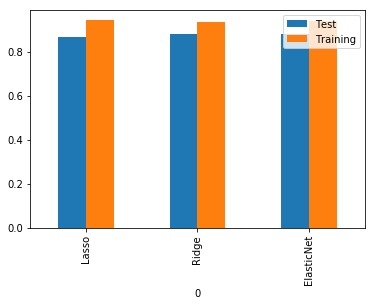

In [52]:
summary = pd.DataFrame(scores).iloc[1:, :]
summary.index = summary.iloc[:, 0]
summary = summary.iloc[:, 1:]
summary.columns = ["Test", "Training"]
summary.plot.bar()

In [ ]:
pd.DataFrame(scores)

In [107]:
target = "SalesPrice"
X = df.drop(columns=[target]) # Features
y = np.log(df[target]) # target variable

X = pd.get_dummies(X, drop_first=True) # One hot encoding

# Randomly split the data into training and test test. 
# Keeping 30% of the records in test set.
# random_state creates a reproducible set of random samples 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("estimator", linear_model.Lasso(alpha=0.05, max_iter=2000)) 
    # alpha: regularization parameter
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
r2_test = metrics.r2_score(y_test, y_test_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print("R2 on test:", r2_test)
print("R2 on train:", r2_train)

print("RMSE on test:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("RMSE on train:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))


est = pipe.steps[-1][-1]
summary = pd.DataFrame({"feature": X.columns
                        
                        , "coefficient": est.coef_})
summary["abs"] = np.abs(summary.coefficient)
summary = summary.sort_values("abs", ascending = False)
summary = summary[summary["abs"] > 0.0]
summary

R2 on test: 0.7922448728991167
R2 on train: 0.7826768177764206
RMSE on test: 0.19815028630288936
RMSE on train: 0.17846083251475386


,feature,coefficient,abs
3,OverallQual,0.135812,0.135812
15,GrLivArea,0.076007,0.076007
25,GarageCars,0.058887,0.058887
6,YearRemodAdd,0.022187,0.022187
11,TotalBsmtSF,0.021313,0.021313
39,MSZoning_RM,-0.017863,0.017863
5,YearBuilt,0.016605,0.016605
23,Fireplaces,0.012819,0.012819
12,1stFlrSF,0.005620,0.005620


In [78]:
_, pvals_ = feature_selection.f_regression(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [75]:
pvals = pd.DataFrame({"pval": pvals_, "feature": X.columns})
pvals = pvals.sort_values("pval")
pvals.iloc[:10, :]

,pval,feature
3,1.543610e-232,OverallQual
15,1.502663e-147,GrLivArea
25,8.980028e-140,GarageCars
26,9.673012e-121,GarageArea
18,7.435435e-106,FullBath
11,4.707153e-98,TotalBsmtSF
151,1.996594e-96,ExterQual_TA
12,1.957045e-95,1stFlrSF
5,2.946855e-85,YearBuilt
6,3.840149e-80,YearRemodAdd


In [109]:
target = "SalesPrice"
X = df.drop(columns=[target]) # Features
y = np.log(df[target]) # target variable

X = pd.get_dummies(X, drop_first=True) # One hot encoding

# Randomly split the data into training and test test. 
# Keeping 30% of the records in test set.
# random_state creates a reproducible set of random samples 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("estimator", linear_model.Lasso(alpha=0.001, max_iter=2000)) 
    # alpha: regularization parameter
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
r2_test = metrics.r2_score(y_test, y_test_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print("R2 on test:", r2_test)
print("R2 on train:", r2_train)

print("RMSE on test:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("RMSE on train:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))


est = pipe.steps[-1][-1]
summary = pd.DataFrame({"feature": X.columns
                        
                        , "coefficient": est.coef_})


R2 on test: 0.8648308786585401
R2 on train: 0.9417975226233891
RMSE on test: 0.15982973314248985
RMSE on train: 0.09235504454648624


In [116]:
scores = - model_selection.cross_val_score(pipe, X_train, y_train, cv = 5
                        , scoring = "neg_mean_squared_error")
scores

array([0.06534028, 0.0148992 , 0.11932297, 0.02461919, 0.00982281])

In [119]:
cv_score = np.mean(scores) # This is like 4.5 avg of 200 rating 
cv_score

0.046800890598484746

In [120]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [128]:
np.linspace(0, 1, 10) - 0.05 + 1.0

array([0.95      , 1.06111111, 1.17222222, 1.28333333, 1.39444444,
       1.50555556, 1.61666667, 1.72777778, 1.83888889, 1.95      ])

In [132]:
np.random.random(10) +0.5

array([0.66958388, 1.30434417, 0.60454659, 0.90634167, 0.51709998,
       0.99515028, 0.86125253, 0.69460795, 0.82611759, 0.98593448])

In [133]:
param_grid = {
    "estimator__l1_ratio": np.linspace(0, 1, 10),
    "estimator__alpha": np.random.random(10) +0.5
}

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("estimator", linear_model.ElasticNet(max_iter=2000)) 
    # alpha: regularization parameter
])

gsearch = model_selection.GridSearchCV(pipe, cv=5, param_grid=param_grid)
gsearch.fit(X_train, y_train)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=2000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'estimator__l1_ratio': array([0.     , 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667,
       0.77778, 0.88889, 1.     ]), 'estimator__alpha': array([1.07291, 0.6944 , 1.43926, 1.38339, 0.61137, 0.81202, 1.47345,
       1.14671, 1.34147, 0.86094])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [135]:
gsearch.best_score_

0.8378038810773515

In [134]:
gsearch.best_params_

{'estimator__alpha': 0.8120175828705457, 'estimator__l1_ratio': 0.0}

In [136]:
y_train_pred = gsearch.predict(X_train)
y_test_pred = gsearch.predict(X_test)
r2_test = metrics.r2_score(y_test, y_test_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print("R2 on test:", r2_test)
print("R2 on train:", r2_train)

print("RMSE on test:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("RMSE on train:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R2 on test: 0.8638097615822017
R2 on train: 0.9033165100938427
RMSE on test: 0.16043230346186596
RMSE on train: 0.1190326345573211


In [137]:
import pickle

In [139]:
with open("model.pkl", "wb") as f:
    pickle.dump(gsearch, f)

In [141]:
!ls -lh

total 1632
-rw-r--r--@ 1 abasar  staff   9.3K Oct 22 17:24 Day 1 - Spark.ipynb
-rw-r--r--  1 abasar  staff   170K Oct 22 16:26 Day 1 - handle null.ipynb
-rw-r--r--  1 abasar  staff   143K Oct 22 11:36 Day 1 - pandas.ipynb
-rw-r--r--@ 1 abasar  staff    59K Oct 22 13:48 Day 1 - top 10 movies.ipynb
-rw-r--r--  1 abasar  staff   247K Oct 22 15:04 Day 1 - visualization.ipynb
-rw-r--r--  1 abasar  staff    47K Oct 23 15:34 Day 2 - regression.ipynb
-rw-r--r--  1 abasar  staff    57K Oct 23 16:51 day 2 - House price prediction problem.ipynb
-rw-r--r--  1 abasar  staff    31K Oct 23 16:51 model.pkl
-rw-r--r--  1 abasar  staff    20K Oct 22 14:23 plt.jpg
-rw-r--r--@ 1 abasar  staff    12K Oct 22 14:31 plt.pdf


In [142]:
with open("model.pkl", "rb") as f:
    model_reloaded = pickle.load(f)

In [143]:
model_reloaded

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=2000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'estimator__l1_ratio': array([0.     , 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667,
       0.77778, 0.88889, 1.     ]), 'estimator__alpha': array([1.07291, 0.6944 , 1.43926, 1.38339, 0.61137, 0.81202, 1.47345,
       1.14671, 1.34147, 0.86094])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [144]:
y_train_pred = model_reloaded.predict(X_train)
y_test_pred = model_reloaded.predict(X_test)
r2_test = metrics.r2_score(y_test, y_test_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print("R2 on test:", r2_test)
print("R2 on train:", r2_train)

print("RMSE on test:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("RMSE on train:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R2 on test: 0.8638097615822017
R2 on train: 0.9033165100938427
RMSE on test: 0.16043230346186596
RMSE on train: 0.1190326345573211


In [147]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train.values)

In [149]:
X_train_std.shape

(1022, 258)

In [150]:
pd.DataFrame(X_train_std).head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,-0.873763,0.624479,0.119034,0.643952,-0.555344,0.183854,-0.411578,0.629676,0.801004,-0.277569,...,-0.062684,-0.054259,-0.297308,-0.044281,0.38846,-0.044281,-0.088823,8.193493,-2.177515,-0.301189
1,0.081557,-0.150423,0.355137,0.643952,-0.555344,0.549935,0.173040,0.161327,1.325697,-0.277569,...,-0.062684,-0.054259,-0.297308,-0.044281,0.38846,-0.044281,-0.088823,-0.122048,0.459239,-0.301189
2,-0.873763,0.409229,-0.169196,-0.831651,-0.555344,-0.381907,-1.239787,-0.197162,-0.973886,-0.277569,...,-0.062684,-0.054259,-0.297308,-0.044281,-2.57427,-0.044281,-0.088823,-0.122048,0.459239,-0.301189
3,0.320387,0.409229,0.565560,-0.093850,2.109264,-1.313748,-1.726969,-0.578780,0.112208,-0.277569,...,-0.062684,-0.054259,-0.297308,-0.044281,0.38846,-0.044281,-0.088823,-0.122048,0.459239,-0.301189
4,-0.634933,-0.667024,-0.508594,-2.307255,-3.219951,-1.047508,-0.947478,-0.578780,-0.973886,-0.277569,...,-0.062684,-0.054259,-0.297308,-0.044281,0.38846,-0.044281,-0.088823,-0.122048,0.459239,-0.301189


In [154]:
pd.DataFrame(X_train_std).describe()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
count,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,...,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03
mean,9.429291e-17,-1.738118e-18,-5.833559e-17,5.127449e-17,-3.463201e-16,3.268097e-15,-3.534681e-15,8.994762e-17,2.775558e-16,1.901067e-17,...,2.001009e-16,1.895907e-16,-7.397866e-17,2.351484e-16,1.121086e-16,1.744229e-16,1.584132e-16,-2.881203e-16,4.302929e-16,4.942774e-17
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00
min,-8.737627e-01,-2.130727e+00,-8.966689e-01,-3.782858e+00,-3.219951e+00,-3.310552e+00,-1.726969e+00,-5.787801e-01,-9.738860e-01,-2.775694e-01,...,-6.268391e-02,-5.425922e-02,-2.973078e-01,-4.428074e-02,-2.574270e+00,-4.428074e-02,-8.882312e-02,-1.220481e-01,-2.177515e+00,-3.011894e-01
25%,-8.737627e-01,-4.517733e-01,-2.969731e-01,-8.316513e-01,-5.553438e-01,-5.815870e-01,-8.500417e-01,-5.787801e-01,-9.738860e-01,-2.775694e-01,...,-6.268391e-02,-5.425922e-02,-2.973078e-01,-4.428074e-02,3.884597e-01,-4.428074e-02,-8.882312e-02,-1.220481e-01,4.592390e-01,-3.011894e-01
50%,-1.572726e-01,-2.127231e-02,-1.082536e-01,-9.384953e-02,-5.553438e-01,5.073419e-02,4.166310e-01,-5.787801e-01,-1.155908e-01,-2.775694e-01,...,-6.268391e-02,-5.425922e-02,-2.973078e-01,-4.428074e-02,3.884597e-01,-4.428074e-02,-8.882312e-02,-1.220481e-01,4.592390e-01,-3.011894e-01
75%,3.203874e-01,4.092287e-01,9.445570e-02,6.439522e-01,3.328587e-01,9.825760e-01,9.038129e-01,3.796008e-01,5.710454e-01,-2.775694e-01,...,-6.268391e-02,-5.425922e-02,-2.973078e-01,-4.428074e-02,3.884597e-01,-4.428074e-02,-8.882312e-02,-1.220481e-01,4.592390e-01,-3.011894e-01
max,3.186348e+00,1.043990e+01,1.960376e+01,2.857357e+00,2.997466e+00,1.282097e+00,1.196122e+00,8.672558e+00,1.121283e+01,8.665800e+00,...,1.595306e+01,1.843005e+01,3.363518e+00,2.258318e+01,3.884597e-01,2.258318e+01,1.125833e+01,8.193493e+00,4.592390e-01,3.320170e+00


In [152]:
pca = decomposition.PCA()
X_train_pca = pca.fit_transform(X_train_std)

In [155]:
pd.DataFrame(X_train_pca).describe()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
count,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,...,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03
mean,4.953637e-17,9.093889e-17,1.229175e-16,9.994180e-18,1.075461e-17,-1.781571e-17,5.996508e-17,-1.194956e-16,-6.039961e-17,2.237827e-17,...,1.286693e-18,9.431491e-18,-1.236855e-18,2.463608e-17,1.236138e-17,1.497350e-17,-5.871224e-18,-1.724148e-17,-3.359362e-18,4.036432e-18
std,4.119656e+00,2.850169e+00,2.724150e+00,2.559075e+00,2.373615e+00,2.235099e+00,2.025671e+00,2.003397e+00,1.887451e+00,1.875141e+00,...,2.574838e-16,2.573140e-16,2.574840e-16,2.563046e-16,2.571898e-16,2.570508e-16,2.574200e-16,2.569085e-16,1.545188e-16,1.316077e-16
min,-1.236753e+01,-9.440973e+00,-3.432031e+00,-5.924086e+00,-6.694179e+00,-8.057743e+00,-6.139815e+00,-1.046043e+01,-5.305706e+00,-1.395758e+01,...,-2.206811e-15,-1.930389e-15,-2.146200e-15,-1.517507e-15,-1.751796e-15,-1.867197e-15,-2.181489e-15,-2.132619e-15,-9.251287e-16,-1.145715e-15
25%,-3.185322e+00,-2.170686e+00,-1.115534e+00,-1.811785e+00,-1.333684e+00,-1.653619e+00,-1.297904e+00,-1.128535e+00,-7.342490e-01,-8.632785e-01,...,-1.057132e-16,-9.400408e-17,-1.051810e-16,-8.387395e-17,-9.140451e-17,-1.045005e-16,-9.522074e-17,-1.098990e-16,-6.657653e-17,-4.511466e-17
50%,-3.558915e-01,1.890238e-01,-3.082434e-01,-2.980131e-01,-2.452599e-01,1.781201e-01,-3.568633e-01,1.349725e-01,-9.494397e-02,8.720625e-02,...,1.286693e-18,2.506061e-18,-1.236855e-18,1.943121e-17,5.939760e-18,1.313257e-17,-5.871224e-18,-1.724148e-17,-5.553650e-18,4.036432e-18
75%,3.645012e+00,1.859955e+00,3.784081e-01,1.210360e+00,7.411196e-01,1.418724e+00,9.136540e-01,1.184650e+00,5.354224e-01,8.449882e-01,...,1.060750e-16,9.925592e-17,9.361161e-17,1.179159e-16,1.033774e-16,1.127288e-16,8.439533e-17,8.217472e-17,5.333982e-17,4.860011e-17
max,1.304485e+01,1.196429e+01,1.933322e+01,1.900405e+01,1.380053e+01,1.092898e+01,1.085253e+01,1.233467e+01,4.037238e+01,2.504245e+01,...,2.666885e-15,3.571761e-15,3.508893e-15,3.911412e-15,2.984705e-15,2.599781e-15,2.317927e-15,2.367659e-15,2.479585e-15,1.658104e-15


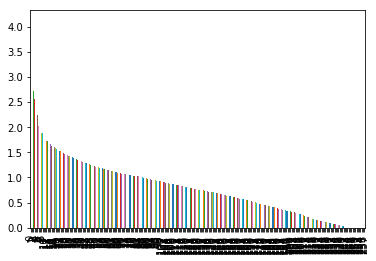

In [159]:
pd.Series(np.std(X_train_pca, axis = 0)).plot.bar()

In [160]:
pca.explained_variance_ratio_.sum()

1.0

In [163]:
explained = pd.Series(np.cumsum(pca.explained_variance_ratio_))
explained[explained>0.99]

191    0.990123
192    0.990671
193    0.991193
194    0.991700
195    0.992199
196    0.992689
197    0.993150
198    0.993589
199    0.994012
200    0.994427
201    0.994819
202    0.995196
203    0.995569
204    0.995918
205    0.996259
206    0.996577
207    0.996889
208    0.997184
209    0.997439
210    0.997673
211    0.997905
212    0.998124
213    0.998302
214    0.998466
215    0.998620
216    0.998763
217    0.998892
218    0.999014
219    0.999121
220    0.999222
         ...   
228    0.999737
229    0.999779
230    0.999816
231    0.999848
232    0.999875
233    0.999900
234    0.999925
235    0.999948
236    0.999964
237    0.999979
238    0.999987
239    0.999993
240    0.999998
241    1.000000
242    1.000000
243    1.000000
244    1.000000
245    1.000000
246    1.000000
247    1.000000
248    1.000000
249    1.000000
250    1.000000
251    1.000000
252    1.000000
253    1.000000
254    1.000000
255    1.000000
256    1.000000
257    1.000000
Length: 67, dtype: float

In [165]:
target = "SalesPrice"
X = df.drop(columns=[target]) # Features
y = np.log(df[target]) # target variable

X = pd.get_dummies(X, drop_first=True) # One hot encoding

# Randomly split the data into training and test test. 
# Keeping 30% of the records in test set.
# random_state creates a reproducible set of random samples 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("pca", decomposition.PCA(n_components=191)),
    ("estimator", linear_model.Lasso(alpha=0.001, max_iter=2000)) 
    # alpha: regularization parameter
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
r2_test = metrics.r2_score(y_test, y_test_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print("R2 on test:", r2_test)
print("R2 on train:", r2_train)

print("RMSE on test:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("RMSE on train:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R2 on test: 0.8652875249593598
R2 on train: 0.9242859253420233
RMSE on test: 0.15955952570723062
RMSE on train: 0.10533633318591275
